# Q. Extract reviews of any product from ecommerce website like amazon & Perform emotion mining


## Emotion Mining
**Emotion mining** is a process of extracting insights from text data to identify the emotions and sentiments expressed by the author. It involves the use of N**atural Language Processing (NLP)** techniques to analyze the text data and identify the emotional tone, sentiment, and underlying feelings expressed by the author. **Emotion mining** is often used in "marketing, customer service, and social media monitoring" to gain insights into customer feedback and sentiment.
## What is sentiment analysis?
**Sentiment Analysis** is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is **positive, negative our neutral**.Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.It is quite hard for a human to go through each single line and identify the emotion being the user experience.But, Now with technology, we can automatically analyzing customer feedback, from survey responses to social media conversations, brands are able to listen attentively to their customers, and tailor products and services to meet their needs.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

## Importing Libraries

In [2]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

## Loading Dataset

In [3]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                Title  \
0        4.0  Good phone-could have been better !   
1        4.0            Nice phone in this budget   
2        4.0               A mildly perfect phone   
3        4.0                               Review   
4        4.0                          About phone   
...      ...                                  ...   
4995     3.0     Like average phone in this price   
4996     5.0                                 Good   
4997     3.0                         Worst Camara   
4998     4.0                         Segment best   
4999     3.0                              Average   

                                                 Review  \
0     I've purchased the 6GB version of this phone w...   
1     Very good phone in this budget. But last year ...   
2     I will try to keep this review short. This rev...   
3     Over all good mobile, camera quality is not ma...   
4                                       Awesome 📱 Phone   
...                                                 ...   
4995                                 Average experience   
4996                 Light weight overall good function   
4997            Camera depth not good, clarity poor ...   
4998                                      Best in range   
4999  Camera quality is not much more likely.Battery...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 19 December 2022  
1           Reviewed in India 🇮🇳 on 3 May 2023  
2      Reviewed in India 🇮🇳 on 12 January 2023  
3           Reviewed in India 🇮🇳 on 3 May 2023  
4           Reviewed in India 🇮🇳 on 2 May 2023  
...                                        ...  
4995  Reviewed in India 🇮🇳 on 3 September 2022  
4996   Reviewed in India 🇮🇳 on 28 October 2022  
4997    Reviewed in India 🇮🇳 on 16 August 2022  
4998       Reviewed in India 🇮🇳 on 2 June 2022  
4999       Reviewed in India 🇮🇳 on 1 June 2022  

[5000 rows x 4 columns]

In [4]:
print ("The shape of the  data is (row, column):"+ str(reviews.shape))
print (reviews.info())

The shape of the  data is (row, column):(5000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       4809 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB
None


In [5]:
def remove_unwanted_words(text):
    unwanted_words = ['Reviewed in India 🇮🇳 on'] #list of unwanted words
    text = re.sub(r'\b(' + '|'.join(unwanted_words) + r')\b', '', text) #remove unwanted words
    return text.strip() #remove leading/trailing whitespace

# apply function to each row of the 'text' column
reviews['Review_Date'] = reviews['Review_Date'].apply(remove_unwanted_words)

reviews

Rating                                Title  \
0        4.0  Good phone-could have been better !   
1        4.0            Nice phone in this budget   
2        4.0               A mildly perfect phone   
3        4.0                               Review   
4        4.0                          About phone   
...      ...                                  ...   
4995     3.0     Like average phone in this price   
4996     5.0                                 Good   
4997     3.0                         Worst Camara   
4998     4.0                         Segment best   
4999     3.0                              Average   

                                                 Review       Review_Date  
0     I've purchased the 6GB version of this phone w...  19 December 2022  
1     Very good phone in this budget. But last year ...        3 May 2023  
2     I will try to keep this review short. This rev...   12 January 2023  
3     Over all good mobile, camera quality is not ma...        3 May 2023  
4                                       Awesome 📱 Phone        2 May 2023  
...                                                 ...               ...  
4995                                 Average experience  3 September 2022  
4996                 Light weight overall good function   28 October 2022  
4997            Camera depth not good, clarity poor ...    16 August 2022  
4998                                      Best in range       2 June 2022  
4999  Camera quality is not much more likely.Battery...       1 June 2022  

[5000 rows x 4 columns]

## Data Exploration

In [6]:
reviews.Rating.describe()

count    5000.000000
mean        4.115800
std         0.889803
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

### No. of Words in the Review

In [7]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  I've purchased the 6GB version of this phone w...         299
1  Very good phone in this budget. But last year ...          48
2  I will try to keep this review short. This rev...         216
3  Over all good mobile, camera quality is not ma...           9
4                                    Awesome 📱 Phone           3

### Number of characters

In [8]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  I've purchased the 6GB version of this phone w...      1715.0
1  Very good phone in this budget. But last year ...       247.0
2  I will try to keep this review short. This rev...      1189.0
3  Over all good mobile, camera quality is not ma...        53.0
4                                    Awesome 📱 Phone        15.0

### Average Word Length

In [9]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  I've purchased the 6GB version of this phone w...  4.755034
1  Very good phone in this budget. But last year ...  4.166667
2  I will try to keep this review short. This rev...  4.509259
3  Over all good mobile, camera quality is not ma...  5.000000
4                                    Awesome 📱 Phone  4.333333

### No. of Stopwords

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  I've purchased the 6GB version of this phone w...        128
1  Very good phone in this budget. But last year ...         16
2  I will try to keep this review short. This rev...         94
3  Over all good mobile, camera quality is not ma...          3
4                                    Awesome 📱 Phone          0

### No. of Special Characters

In [11]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  I've purchased the 6GB version of this phone w...         0
1  Very good phone in this budget. But last year ...         0
2  I will try to keep this review short. This rev...         0
3  Over all good mobile, camera quality is not ma...         0
4                                    Awesome 📱 Phone         0

### Number of Numerics

In [12]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  I've purchased the 6GB version of this phone w...         2
1  Very good phone in this budget. But last year ...         1
2  I will try to keep this review short. This rev...         0
3  Over all good mobile, camera quality is not ma...         0
4                                    Awesome 📱 Phone         0

### Number of Uppercase Words

In [13]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  I've purchased the 6GB version of this phone w...      4
1  Very good phone in this budget. But last year ...      2
2  I will try to keep this review short. This rev...      3
3  Over all good mobile, camera quality is not ma...      0
4                                    Awesome 📱 Phone      0

In [14]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

## Preprocessing

In [15]:
#Creating a copy
reviews=reviews.copy()

#Checking for null values
reviews.isnull().sum()

Rating           0
Title            2
Review         191
Review_Date      0
dtype: int64

- We got **2 null values in Title** and **191 null values in Review** columns. 
- Impute them as missing and explore why they didn't leave any review.

In [16]:
reviews['Review']=reviews['Review'].fillna('Missing')

## Spelling correction
- We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

- In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

- To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on **‘NLP for beginners using textblob’**.

In [17]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    Very good phone in this budget. But last year ...
2    I will try to keep this review short. His revi...
3    Over all good mobile, camera quality is not wa...
4                                      Awesome 📱 Shone
Name: Review, dtype: object

## Creating 'Sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [18]:
#Figuring out the distribution of categories
reviews['Rating'].value_counts()

4.0    2295
5.0    1824
3.0     631
2.0     136
1.0     114
Name: Rating, dtype: int64

In [19]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['Rating'] == 3.0:
        val = 'Neutral'
    elif row['Rating'] == 1.0 or row['Rating'] == 2.0:
        val = 'Negative'
    elif row['Rating'] == 4.0 or row['Rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [20]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(f, axis=1)
reviews.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0            Nice phone in this budget   
2     4.0               A mildly perfect phone   
3     4.0                               Review   
4     4.0                          About phone   

                                              Review       Review_Date  \
0  I've purchased the 6GB version of this phone w...  19 December 2022   
1  Very good phone in this budget. But last year ...        3 May 2023   
2  I will try to keep this review short. This rev...   12 January 2023   
3  Over all good mobile, camera quality is not ma...        3 May 2023   
4                                    Awesome 📱 Phone        2 May 2023   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [21]:
reviews['Sentiment'].value_counts()

Positive    4119
Neutral      631
Negative     250
Name: Sentiment, dtype: int64

## Review text-Punctuation Cleaning
Let's begin our text processing by removing the punctuations

In [22]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
reviews['Review']=reviews['Review'].apply(lambda x:review_cleaning(x))
reviews.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0            Nice phone in this budget   
2     4.0               A mildly perfect phone   
3     4.0                               Review   
4     4.0                          About phone   

                                              Review       Review_Date  \
0  ive purchased the  version of this phone which...  19 December 2022   
1  very good phone in this budget but last year t...        3 May 2023   
2  i will try to keep this review short this revi...   12 January 2023   
3  over all good mobile camera quality is not mat...        3 May 2023   
4                                    awesome 📱 phone        2 May 2023   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

- We have removed all the Punctuations from 'Review' column.

## Review text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [24]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all',]

In [25]:
reviews['Review'] = reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0            Nice phone in this budget   
2     4.0               A mildly perfect phone   
3     4.0                               Review   
4     4.0                          About phone   

                                              Review       Review_Date  \
0  ive purchased version phone comes extendable g...  19 December 2022   
1  good phone budget but last year phone selling ...        3 May 2023   
2  will try keep review short review perspective ...   12 January 2023   
3            good mobile camera quality not matching        3 May 2023   
4                                    awesome 📱 phone        2 May 2023   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

- We have removed all the Stopwords from the 'Review' column.

## Feature Engineering

In [26]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       19
1        3
2       12
3        3
4        2
        ..
4995     3
4996    28
4997    16
4998     2
4999     1
Name: Review_Date, Length: 5000, dtype: object 
 0        December
1             May
2         January
3             May
4             May
          ...    
4995    September
4996      October
4997       August
4998         June
4999         June
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [27]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date      Month  Year
0      19   December  2022
1       3        May  2023
2      12    January  2023
3       3        May  2023
4       2        May  2023
...   ...        ...   ...
4995    3  September  2022
4996   28    October  2022
4997   16     August  2022
4998    2       June  2022
4999    1       June  2022

[5000 rows x 3 columns]

In [28]:
df.Month.value_counts()

November     663
April        601
March        512
October      506
August       399
December     395
September    368
January      365
July         348
February     328
June         300
May          215
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [30]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0        12
1         5
2         1
3         5
4         5
...     ...
4995      9
4996     10
4997      8
4998      6
4999      6

[5000 rows x 1 columns]

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       5000 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Sentiment    5000 non-null   object 
 5   Date         5000 non-null   object 
 6   Month        5000 non-null   int64  
 7   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB


In [32]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       5000 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Sentiment    5000 non-null   object 
 5   Date         5000 non-null   int64  
 6   Month        5000 non-null   int64  
 7   Year         5000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 312.6+ KB


### Dropping the Original Columns after splitting the data

In [33]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0            Nice phone in this budget   
2     4.0               A mildly perfect phone   
3     4.0                               Review   
4     4.0                          About phone   

                                              Review Sentiment  Date  Month  \
0  ive purchased version phone comes extendable g...  Positive    19     12   
1  good phone budget but last year phone selling ...  Positive     3      5   
2  will try keep review short review perspective ...  Positive    12      1   
3            good mobile camera quality not matching  Positive     3      5   
4                                    awesome 📱 phone  Positive     2      5   

   Year  
0  2022  
1  2023  
2  2023  
3  2023  
4  2023

In [34]:
df

Rating                                Title  \
0        4.0  Good phone-could have been better !   
1        4.0            Nice phone in this budget   
2        4.0               A mildly perfect phone   
3        4.0                               Review   
4        4.0                          About phone   
...      ...                                  ...   
4995     3.0     Like average phone in this price   
4996     5.0                                 Good   
4997     3.0                         Worst Camara   
4998     4.0                         Segment best   
4999     3.0                              Average   

                                                 Review       Review_Date  \
0     ive purchased version phone comes extendable g...  19 December 2022   
1     good phone budget but last year phone selling ...        3 May 2023   
2     will try keep review short review perspective ...   12 January 2023   
3               good mobile camera quality not matching        3 May 2023   
4                                       awesome 📱 phone        2 May 2023   
...                                                 ...               ...   
4995                                 average experience  3 September 2022   
4996                 light weight overall good function   28 October 2022   
4997                 camera depth not good clarity poor    16 August 2022   
4998                                         best range       2 June 2022   
4999  camera quality not much likelybattery performa...       1 June 2022   

     Sentiment Date      Month  Year  
0     Positive   19   December  2022  
1     Positive    3        May  2023  
2     Positive   12    January  2023  
3     Positive    3        May  2023  
4     Positive    2        May  2023  
...        ...  ...        ...   ...  
4995   Neutral    3  September  2022  
4996  Positive   28    October  2022  
4997   Neutral   16     August  2022  
4998  Positive    2       June  2022  
4999   Neutral    1       June  2022  

[5000 rows x 8 columns]

## Story Generation and Visualization from reviews
In this section we will complete do Exploratory Data Analysis on texts as well as other factors to understand, what are all those features which contributes to the Sentiment.

### Prior analysis assumptions:

- Higher the helpful rate the sentiment becomes positive
- There will be many negative sentiment reviews in the 2013 and 2014 year
- There will be more reviews at the starting of a month

### These assumptions will be verified with our plots also we will do text analysis.

## Data vs Reviews Count

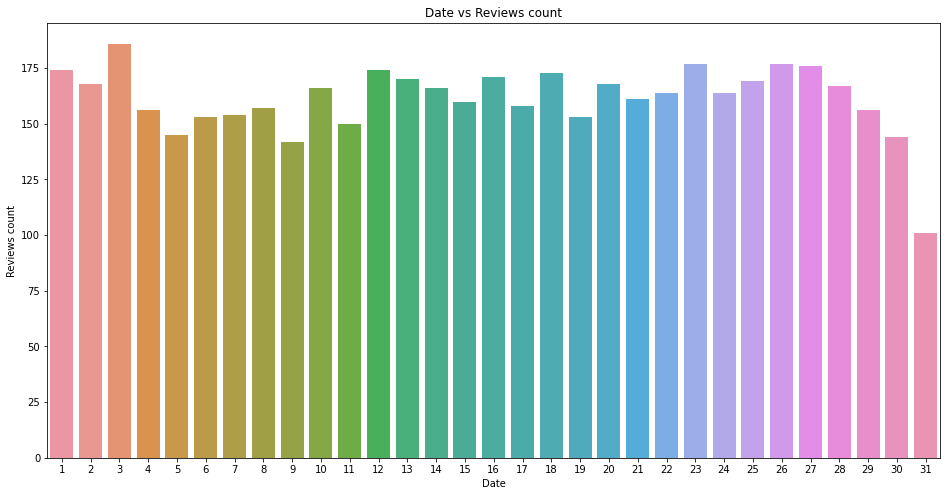

In [35]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

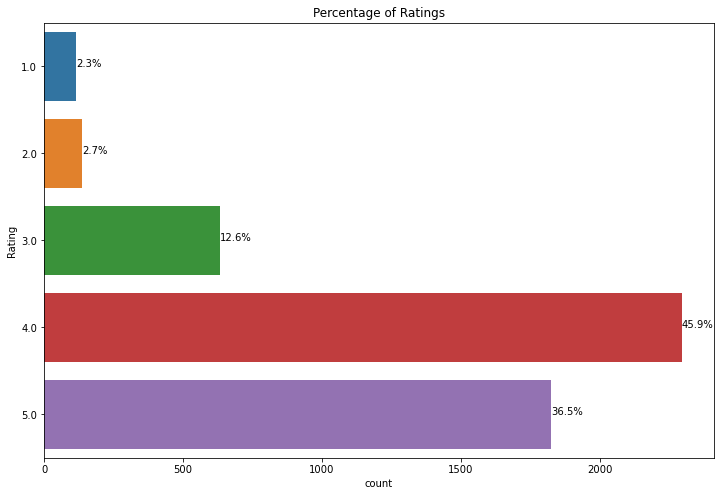

In [36]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

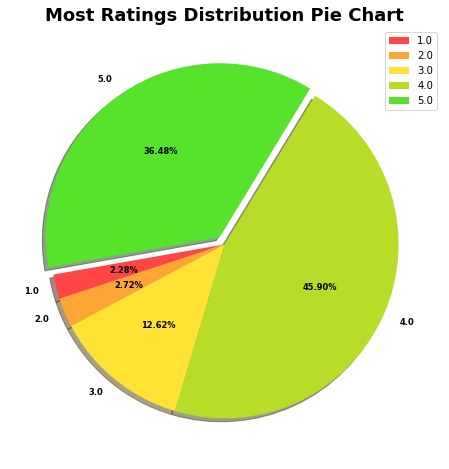

In [40]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

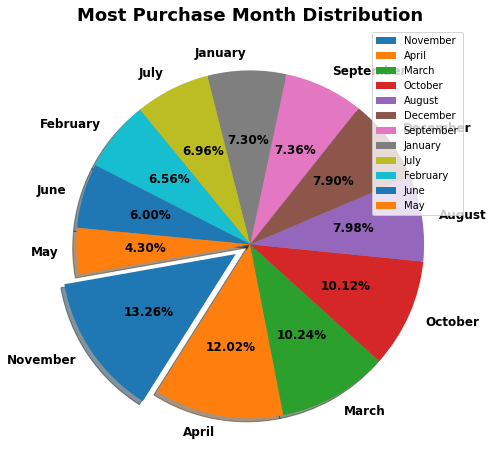

In [55]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

## Polarity 
Now, let's create polarity, review length and word count

**Polarity:** We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

**Review length:** length of the review which includes each letters and spaces

**Word length:** This measures how many words are there in review

In [58]:
reviews['polarity'] = reviews['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['Review'].astype(str).apply(len)
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split()))

In [59]:
reviews.head()

Rating                                Title  \
0     4.0  Good phone-could have been better !   
1     4.0            Nice phone in this budget   
2     4.0               A mildly perfect phone   
3     4.0                               Review   
4     4.0                          About phone   

                                              Review       Review_Date  \
0  ive purchased version phone comes extendable g...  19 December 2022   
1  good phone budget but last year phone selling ...        3 May 2023   
2  will try keep review short review perspective ...   12 January 2023   
3            good mobile camera quality not matching        3 May 2023   
4                                    awesome 📱 phone        2 May 2023   

  Sentiment  polarity  review_len  word_count  
0  Positive  0.153030        1138         164  
1  Positive  0.125000         157          27  
2  Positive  0.186131         735         112  
3  Positive  0.700000          39           6  
4  Positive  1.000000          15           3

# N-gram analysis¶
N-gram analysis is a technique used in natural language processing to analyze and understand the frequency and distribution of sequences of words in a text corpus. An n-gram is a sequence of n words in a text, and n-gram analysis involves analyzing the occurrence and frequency of different n-grams in the text.

For example, if we have the sentence "The quick brown fox jumps over the lazy dog", the following are examples of n-grams of various sizes:

- **Unigrams:** ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
- **Bigrams:** ["The quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over the", "the lazy", "lazy dog"]
- **Trigrams:** ["The quick brown", "quick brown fox", "brown fox jumps", "fox jumps over", "jumps over the", "over the lazy", "the lazy dog"]<br>

N-gram analysis can be useful in a variety of applications, such as language modeling, sentiment analysis, and information retrieval. By analyzing the frequency and distribution of n-grams in a text corpus, we can gain insights into the structure and patterns of the language, which can inform our understanding of how the language is used and how it might be processed by machines.

## Unigram/Monogram Analysis
Here we will plot most frequent **one word** in reviews based on sentiments

In [68]:
#Filtering data
review_pos = reviews[reviews["Sentiment"]=='Positive'].dropna()
review_neu = reviews[reviews["Sentiment"]=='Neutral'].dropna()
review_neg = reviews[reviews["Sentiment"]=='Negative'].dropna()

#Custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

#Custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

#Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

#Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

#Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

#Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

**As we see, the words doen't match with the sentiment except few. Through monogram we can't judge a sendiment based on one word. So let's try with frequent two words**

## Bigram Analysis
Here we will plot most frequent two words in reviews based on sentiments

In [69]:
#Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

#Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

#Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



#Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

**Here we can get a clearer idea about the sentiments from the bi-words**

## Trigram Analysis
Here we will plot most frequent three words in reviews based on sentiments

In [70]:
#Get the bar chart from positive reviews ##
for sent in review_pos["Review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

#Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

#Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




#Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

**We have completed our text ngram analysis. Let's look at wordcloud**

## Wordcloud
### Positive reviews
Let's look at the word cloud of positive reviews

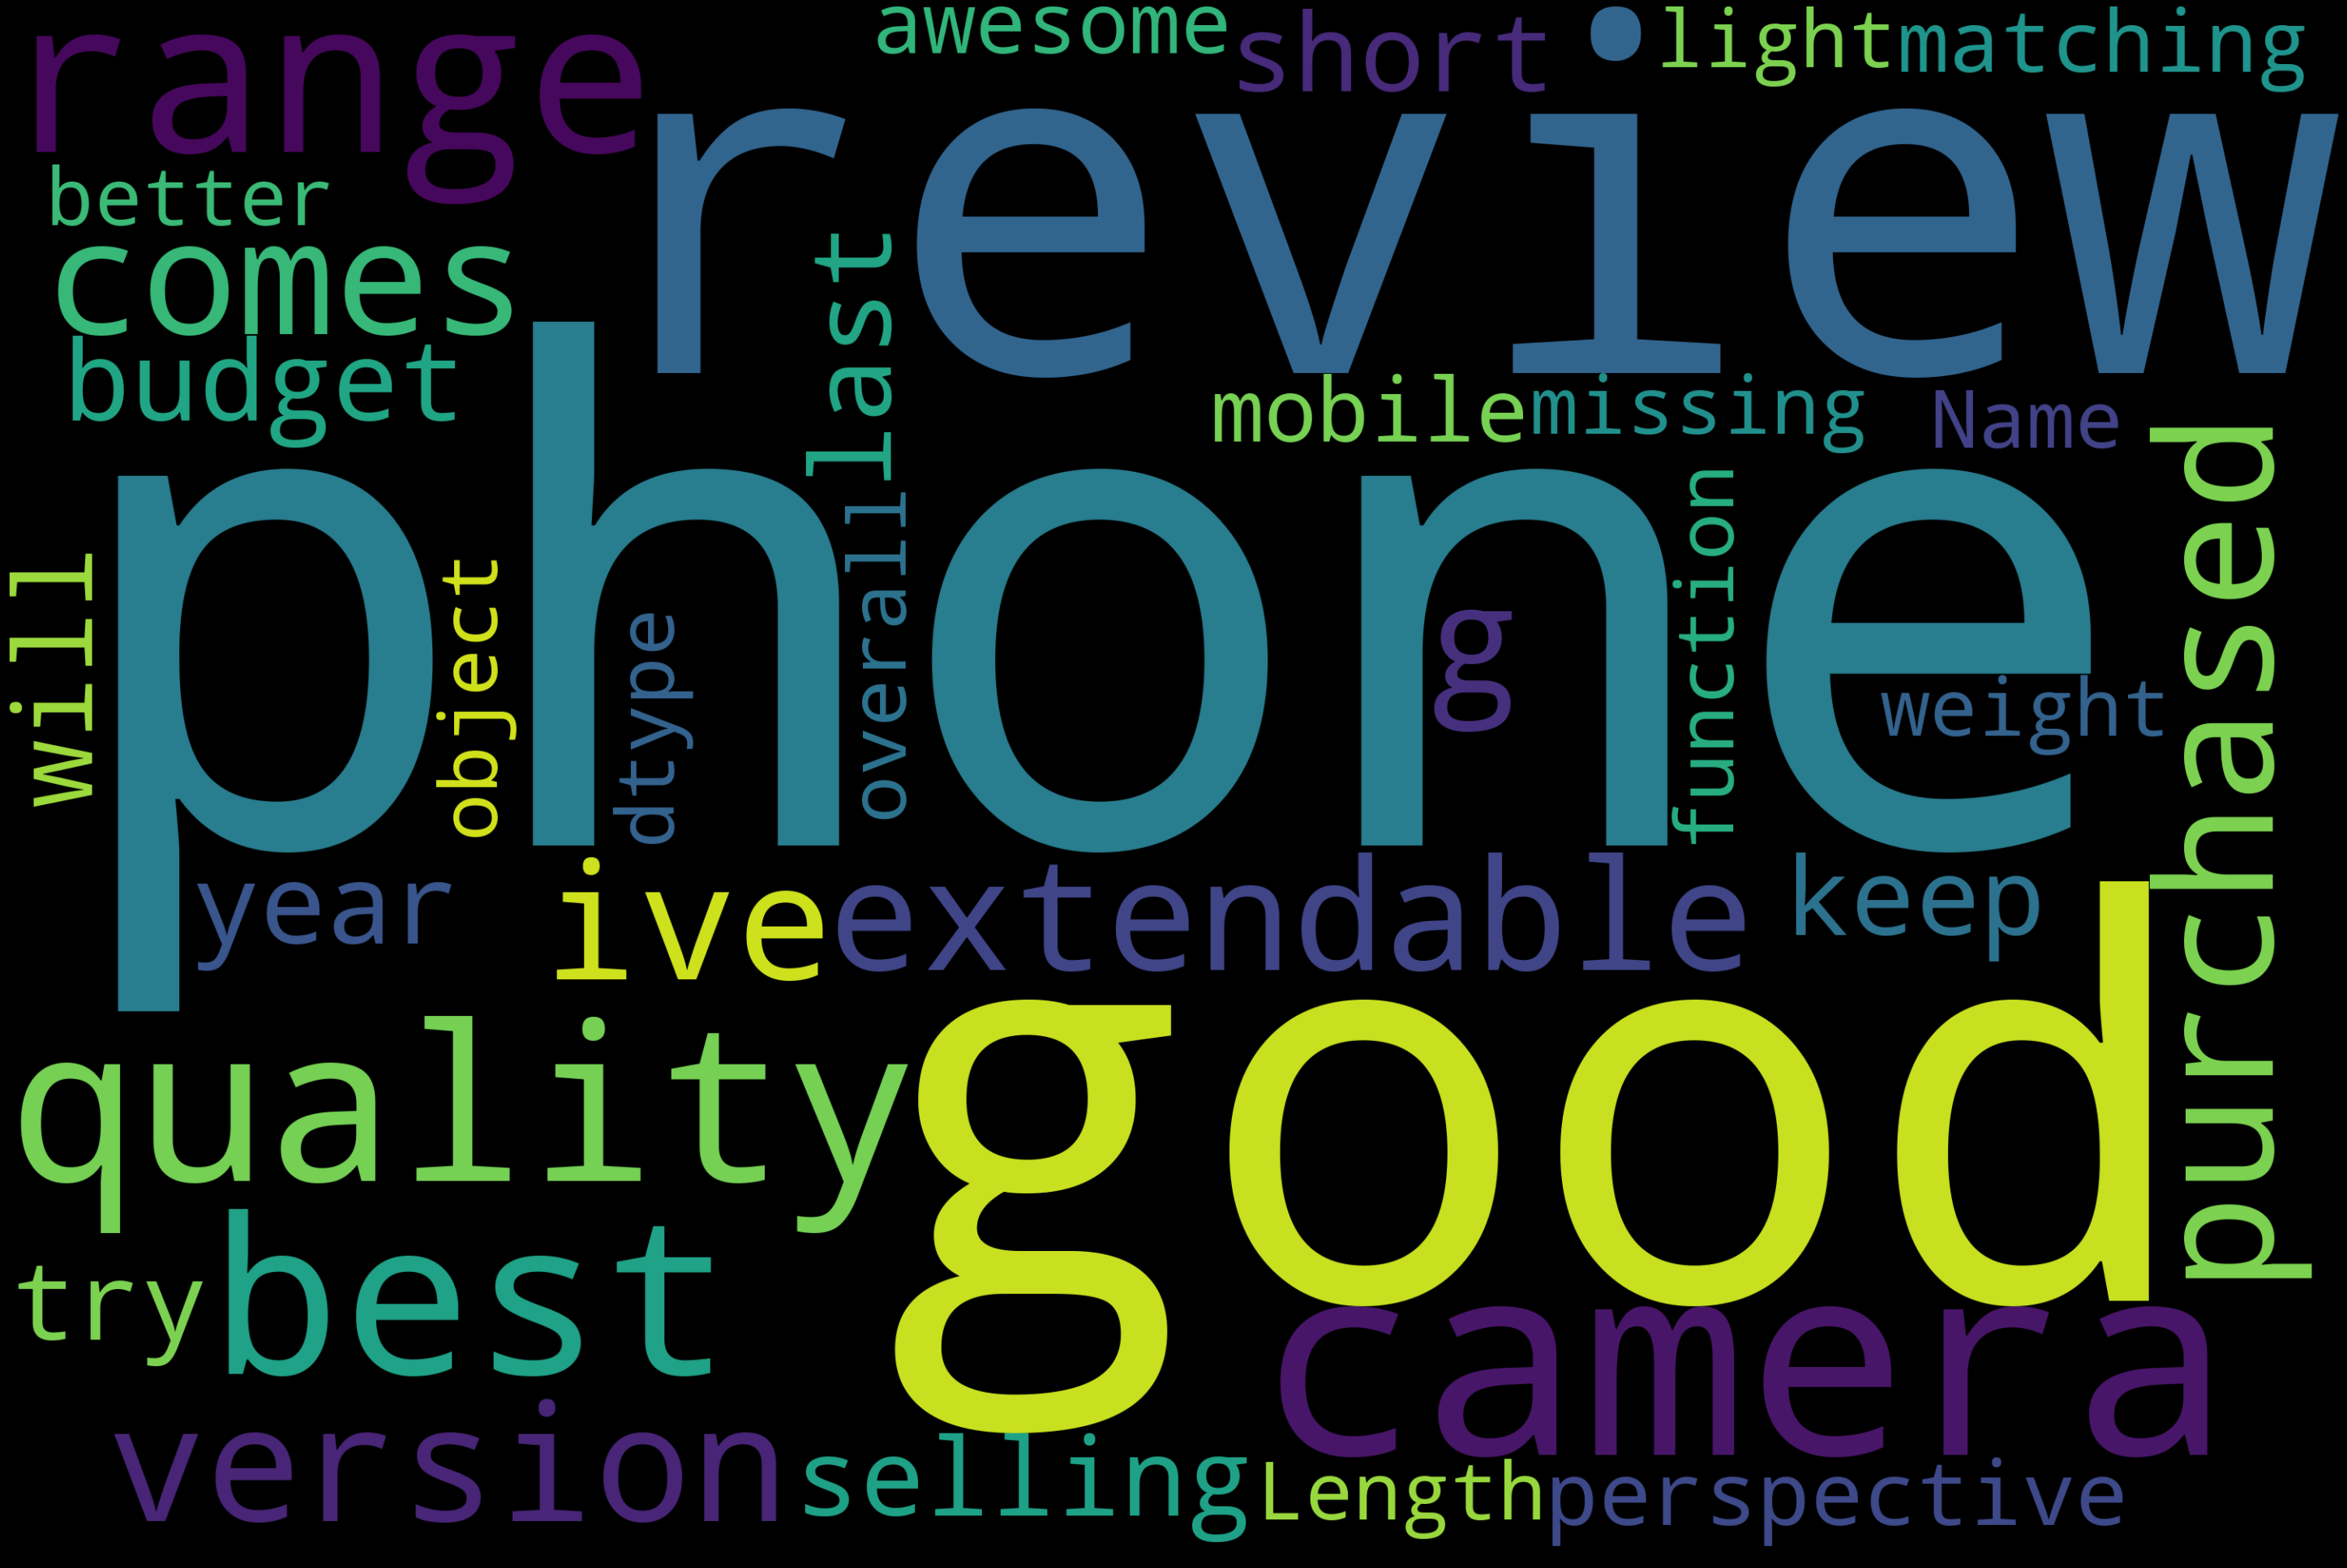

In [71]:
text = review_pos["Review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see positive words like good, best, awesome, perspective, etc.,**

### Neutral reviews
Let's look at the word cloud of neutral reviews

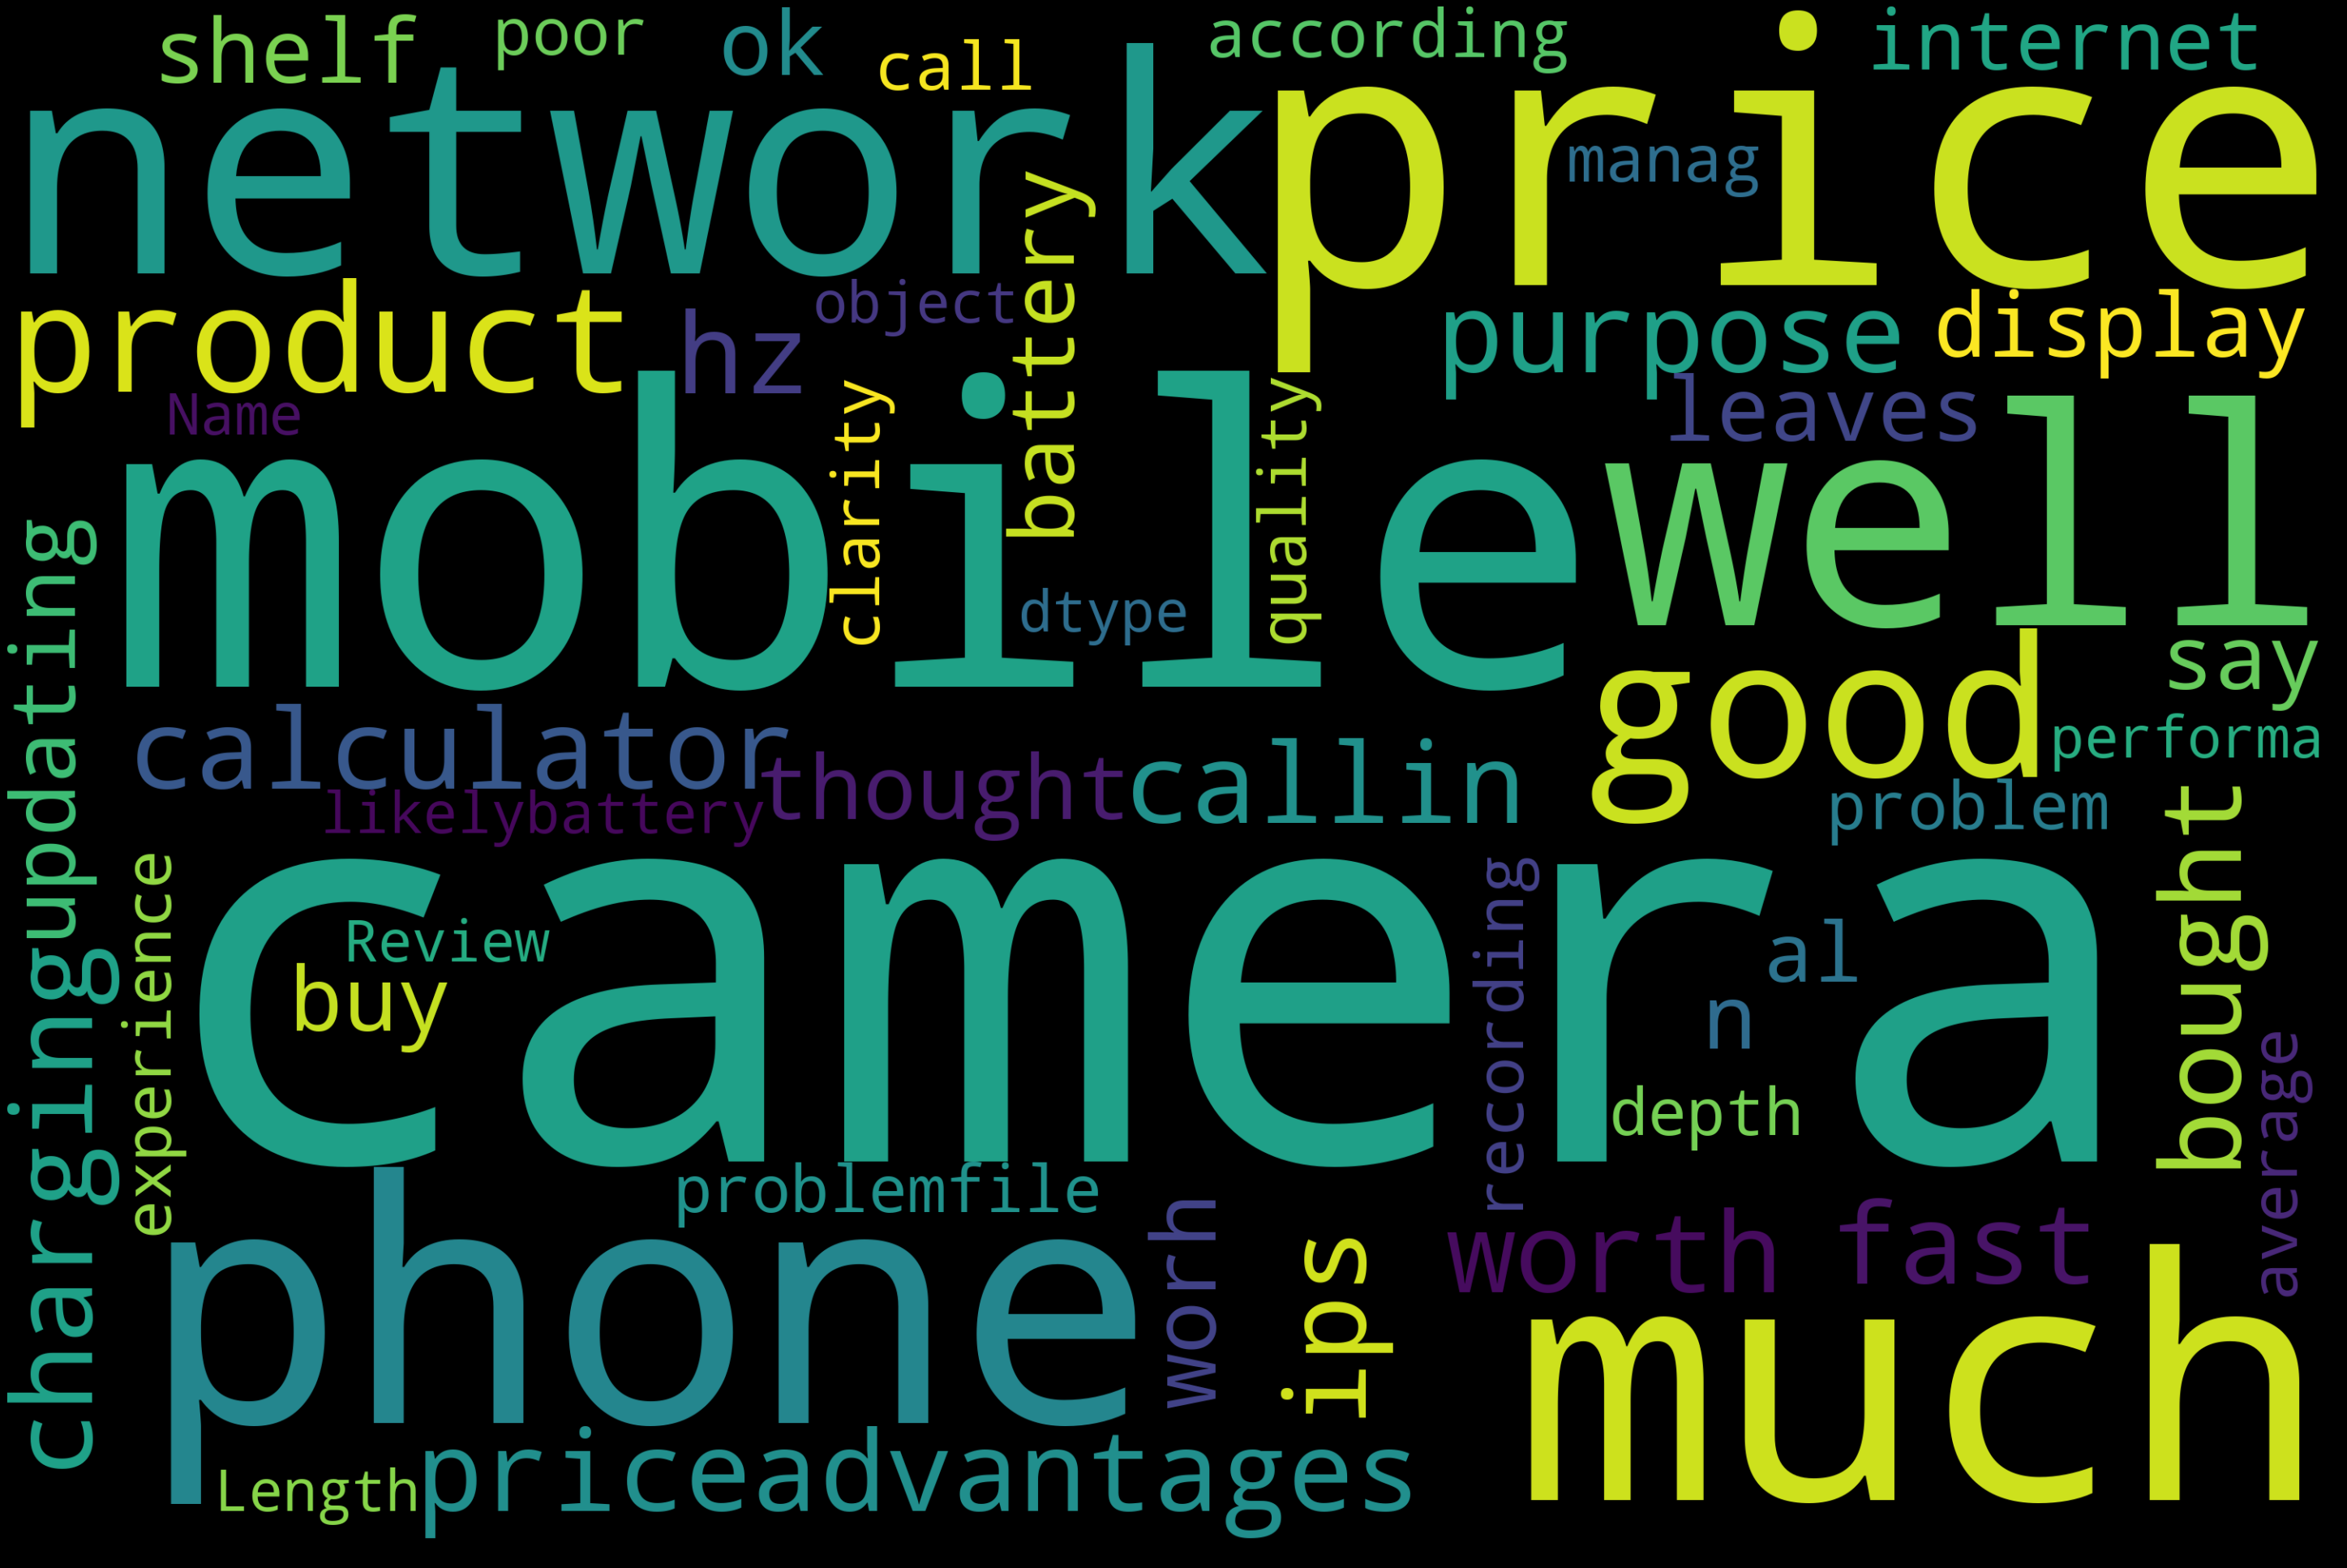

In [72]:
text = review_neu["Review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Most of the neutral review words are focussed on the products and how can they be improved.**

## Negative reviews
Let's look at the word cloud of negative reviews

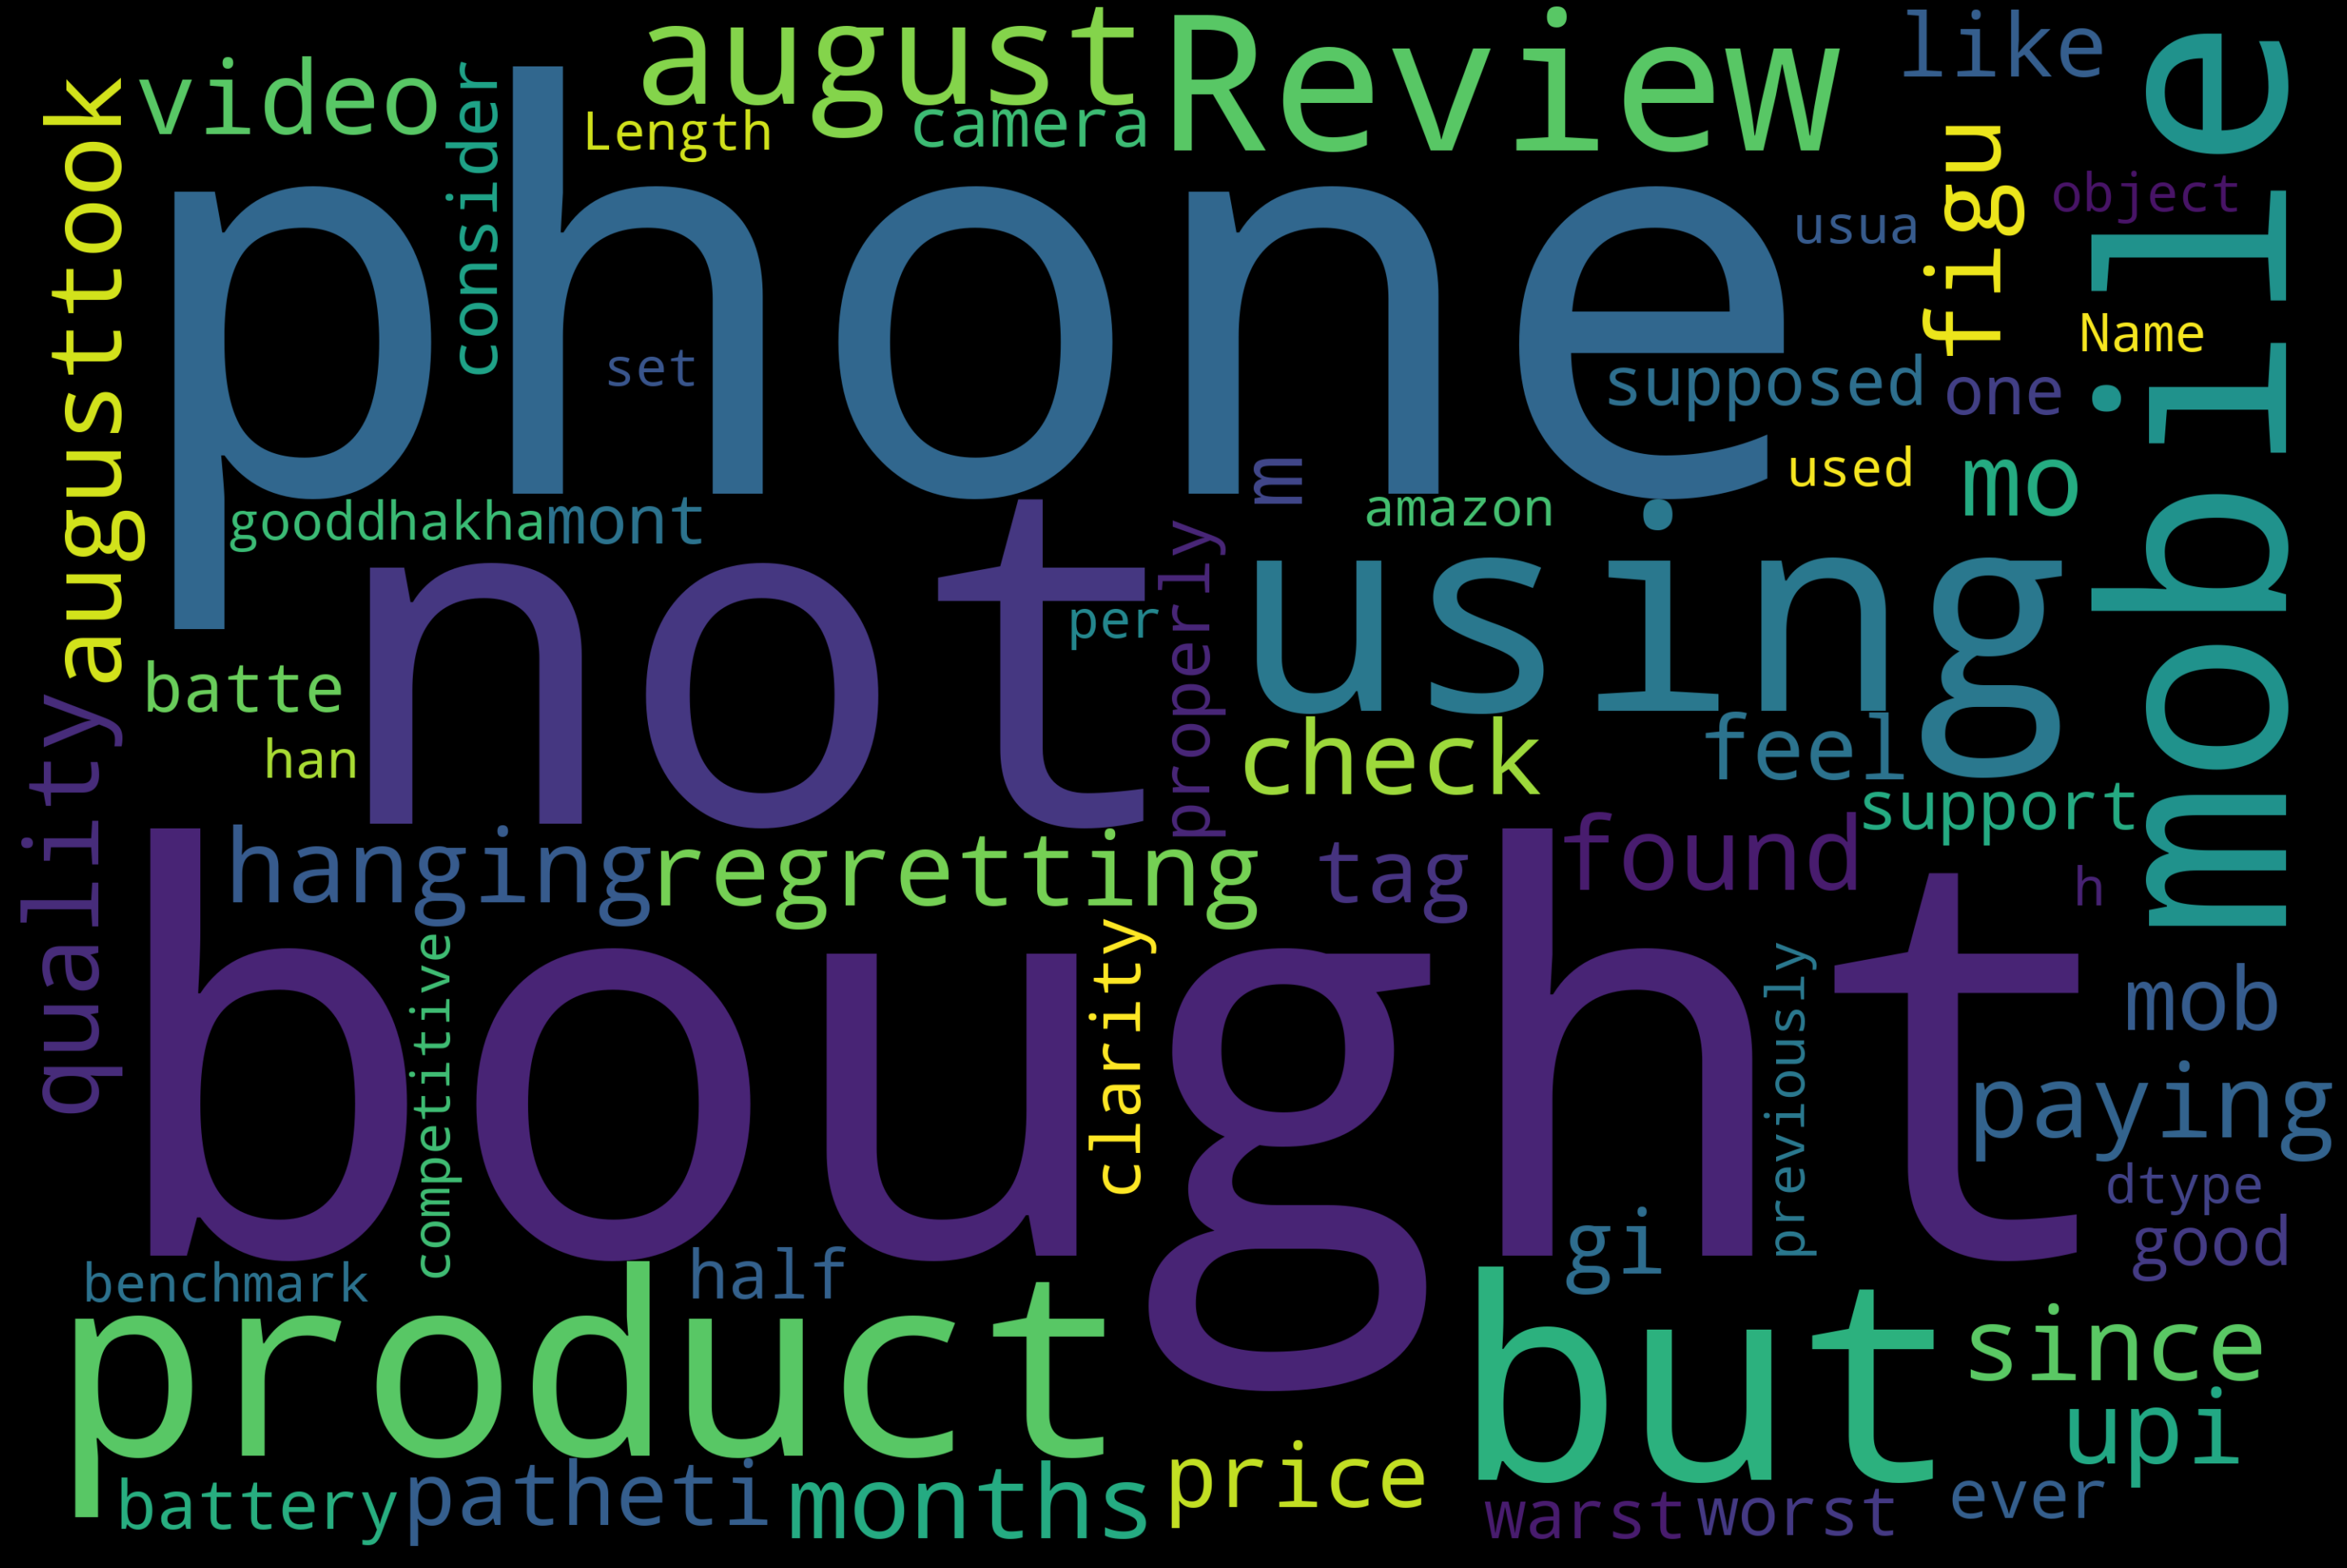

In [74]:
text = review_neg["Review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see negative review words such as pathetic, worst, regretting, not, etc.**

## Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

## Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [75]:
#Calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
#Encode labels in column 'sentiment'. 
reviews['Sentiment']= label_encoder.fit_transform(reviews['Sentiment']) 
  
reviews['Sentiment'].unique() 

array([2, 1, 0])

In [76]:
reviews['Sentiment'].value_counts()

2    4119
1     631
0     250
Name: Sentiment, dtype: int64

## Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

- Going->go
- Finally->fina<br>

If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [77]:
#Extracting 'reviews' for processing
review_features=reviews.copy()
review_features=review_features[['Review']].reset_index(drop=True)
review_features.head()

Review
0  ive purchased version phone comes extendable g...
1  good phone budget but last year phone selling ...
2  will try keep review short review perspective ...
3            good mobile camera quality not matching
4                                    awesome 📱 phone

In [79]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#Splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['Review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [80]:
corpus[3]

'good mobil camera qualiti not match'

**This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF**

# TFIDF(Term Frequency — Inverse Document Frequency)
- TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

- Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['Review'])

In [82]:
X.shape

(5000, 5000)

In [83]:
#Getting the target variable(encoded)
y=reviews['Sentiment']

## SMOTE - Handling Imbalance target feature 
- In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situations. Here we use **SMOTE(Synthetic Minority Oversampling Technique)** to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

- **SMOTE** synthesizes new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [84]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 4119, 1: 631, 0: 250})
Resampled dataset shape Counter({2: 4119, 1: 4119, 0: 4119})


**Great, the resampled data has equally distributed classes**

## Train-test split - (75:25)
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [85]:
#Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

## Model Building: Sentiment Analysis
As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection
First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process


In [87]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8263999999999999
Decision Tree Test Accuracy: 0.7904000000000001
KNN Test Accuracy: 0.8230000000000001
SVC Test Accuracy: 0.8198000000000001
Naive Bayes Test Accuracy: 0.7986000000000002


### **From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 80%. That's great. So let's go with logistic regression with hyperparameter tuning.**

## Logistic Regression with Hyperparameter tuning
We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In [88]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=16.768329368110066, random_state=0)
The mean accuracy of the model is: 0.8533980582524272


**From the selected params, we get accuracy. Let's plug and chug**

In [89]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


- **We have got 85% accuracy. That ain't bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy.**

## Classification metrics
Here we plot the confusion matrix with ROC and check our f1 score

Confusion matrix, without normalization


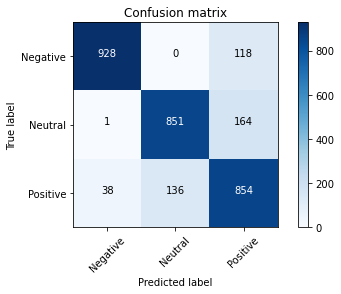

In [90]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

Check out the diagonal elements(928+851+854), they are correctly predicted records and rest are incorrectly classified by the algorithm

In [91]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1046
           1       0.86      0.84      0.85      1016
           2       0.75      0.83      0.79      1028

    accuracy                           0.85      3090
   macro avg       0.86      0.85      0.85      3090
weighted avg       0.86      0.85      0.85      3090



**Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified**

## ROC - AUC Curve
This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plot ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the ROC curve.

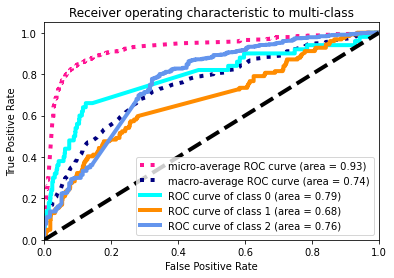

In [92]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

- **Micro and Macro average**: Micro average preforms really well and Macro average shows a satisfactory score. 
- **ROC curve for classes**: Class 2 and 0 have been classified pretty well and their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR.
- A **macro-average** will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a **micro-average** will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance.

## Conclusion
- We have done classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights from the notebook.
- And considered **ngram in sentiment analysis** as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis.
- Most of our neutral reviews were actual critic of product from the buyers, so Amazon can consider these as feedback and give them to the seller to help them improve their products.
- Most of the reviews in this dataset were about string instruments.
- Balancing the dataset got us a very fruitful accuracy score. Without balancing, We got good precision but very bad recall and inturn affected the f1 score. So balancing the target feature is important.
- In sentiment analysis, we should concentrate on our f1 score where we got an average of 85% so we did a pretty good job.